<h1>EDA & Classification (comparing multiple</h1>

<h3>Import Libraries</h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

<h3>Import Dataset</h3>

In [2]:
df = pd.read_csv('patients.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Diagnosis
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<h3>Detecting Missing Values</h3>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Diagnosis      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


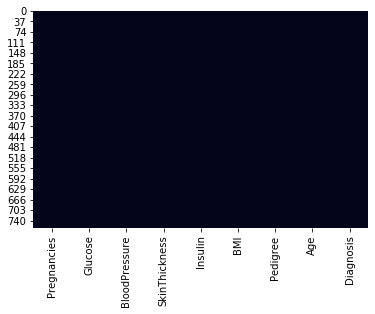

In [8]:
sns.heatmap(df.isnull(), cbar=False)

<p>No Missing Values Detected.</p>

<h4>Summary Statistics</h4>

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Diagnosis
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<h4>IQR for each column.</h4>

In [10]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies        5.0000
Glucose           41.2500
BloodPressure     18.0000
SkinThickness     32.0000
Insulin          127.2500
BMI                9.3000
Pedigree           0.3825
Age               17.0000
Diagnosis          1.0000
dtype: float64


In [12]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Diagnosis
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


<h4>Histogram for Each Variable</h4>

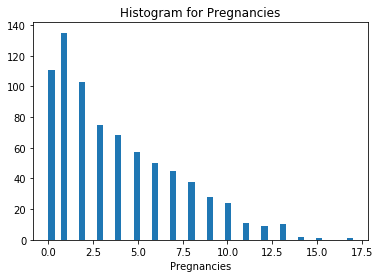

In [15]:
plt.hist(df["Pregnancies"], bins = 50)
plt.xlabel('Pregnancies')
plt.ylabel('')
plt.title(r'Histogram for Pregnancies')
plt.show()

<h4>Histogram for Pregnancies:
    Distribution of time pregnent, as number increases less people on that category.</h4>

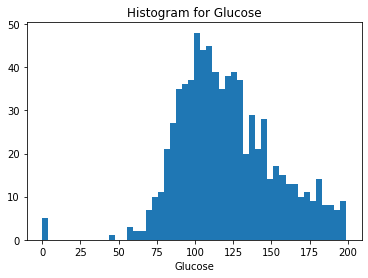

In [18]:
plt.hist(df["Glucose"], bins = 50)
plt.xlabel('Glucose')
plt.ylabel('')
plt.title(r'Histogram for Glucose')
plt.show()

<h4>Histogram for Glucose:
    Distribution of Glucose. High count around 100</h4>

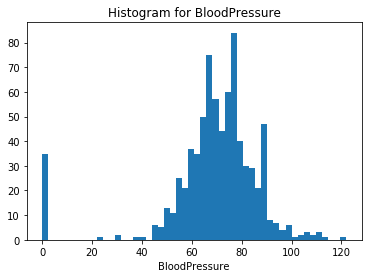

In [19]:
plt.hist(df["BloodPressure"], bins = 50)
plt.xlabel('BloodPressure')
plt.ylabel('')
plt.title(r'Histogram for BloodPressure')
plt.show()

<h4>Histogram for Blood Pressure:
    Distribution of Blood Pressure, possible outliers with highest distribution around 75.</h4>

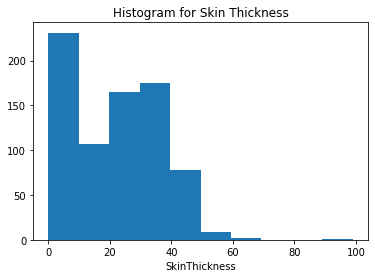

In [23]:
plt.hist(df["SkinThickness"])
plt.xlabel('SkinThickness')
plt.ylabel('')
plt.title(r'Histogram for Skin Thickness')
plt.show()

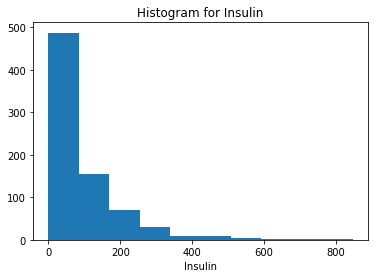

In [22]:
plt.hist(df["Insulin"])
plt.xlabel('Insulin')
plt.ylabel('')
plt.title(r'Histogram for Insulin')
plt.show()

<h4>BoxPlot</h4>

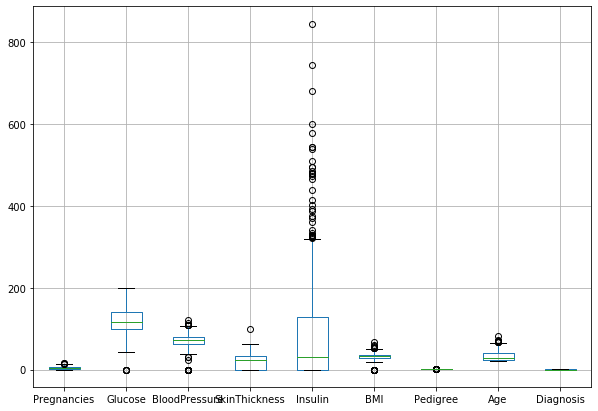

In [24]:
plt.figure(figsize = (10, 7)) 
df.boxplot() 

<h4>Box plot for each variable:
    Outliers present mostly on column Insulin.</h4>

<h4>Box plot For Pregnancies: Few possible outliers.</h4>

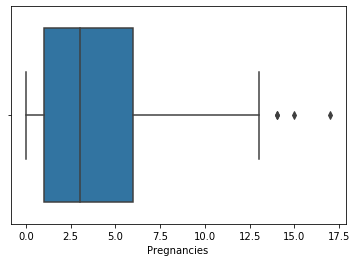

In [27]:
sns.boxplot(x='Pregnancies',data = df)

<h4>Box plot For Glucose: Few or no outliers.</h4>

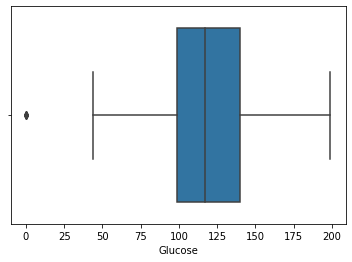

In [28]:
sns.boxplot(x='Glucose',data = df)

<h4>Box plot For BloodPressure: Few outliers.</h4>

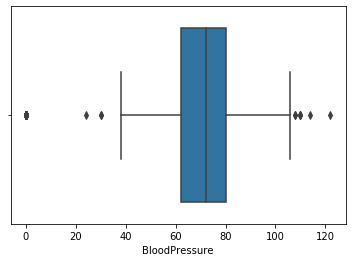

In [29]:
sns.boxplot(x='BloodPressure',data = df)

<h4>Box plot For SkinThickness: Few or no outliers.</h4>

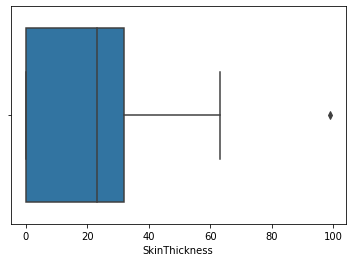

In [30]:
sns.boxplot(x='SkinThickness',data = df)

<h4>Bofplot of Insulin: Outliers are present.</h4>

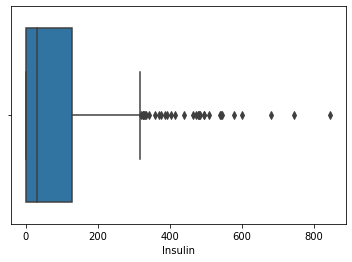

In [26]:
sns.boxplot(x='Insulin',data = df)

<h3>Correlation Matrix Heatmap for each variables</h3>

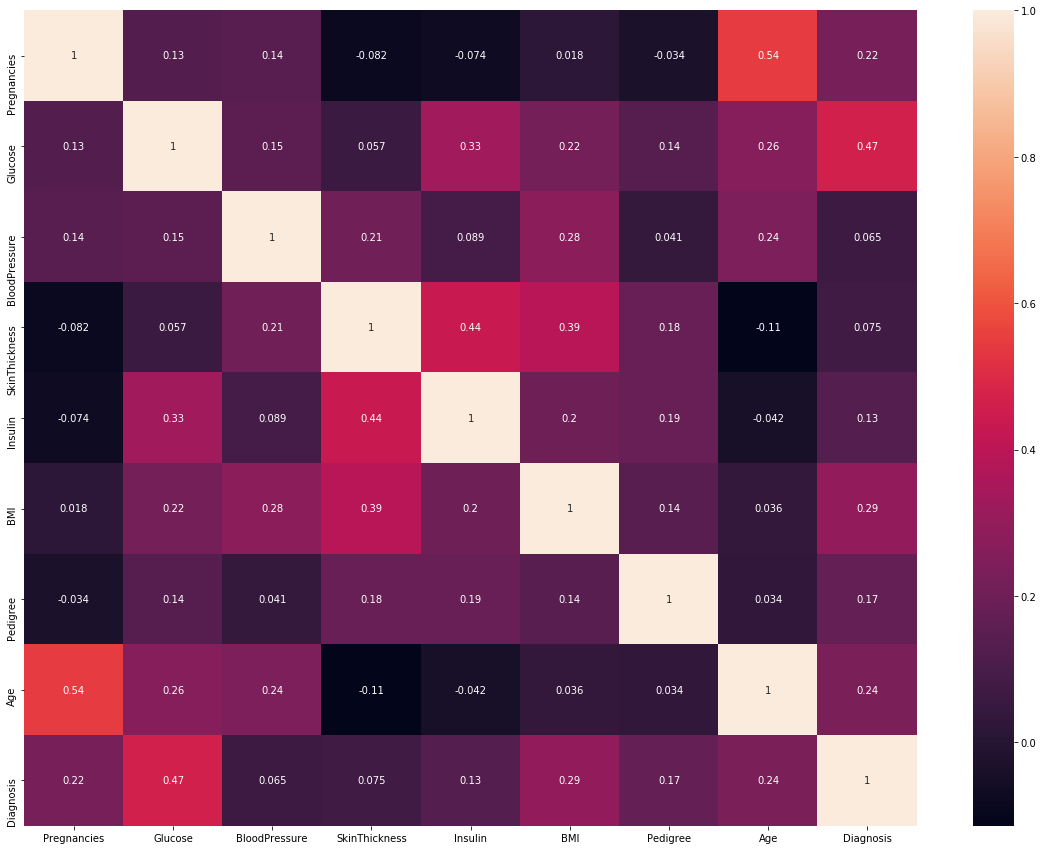

In [32]:
corrMatrix = df.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corrMatrix, annot=True, )
plt.show()

<h4>Whiter shades represents positive relationship, Darker shades represents negative relationship and purple shades represents no or very less correlation between any present variables in the dataframe. </h4>

<h2>Our response and Independent variables<h3>

In [33]:
X = df.iloc[:, 0:8]
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [34]:
y = df.iloc[:, 8]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Diagnosis, dtype: int64

<h3> Training and Testing Sets</h3>

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

<h3> Feature Scaling (Standarizing)</h3>

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<h2 style="color:red"> <center> Logistic Regression w/ all responses (LRM2)</h2>

<h3> Fitting Logistic Regression</h3>

In [37]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<h3> Predicted values (w/ Logistic Regression Model)</h3>

In [39]:
y_hat = classifier.predict(X_test)
print(y_hat)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0]


<h3> Confusion Matrix for Logistic Regression Model</h3>

In [40]:
from sklearn.metrics import confusion_matrix
conmat = confusion_matrix(y_test, y_hat)
conmat

array([[98,  9],
       [18, 29]], dtype=int64)

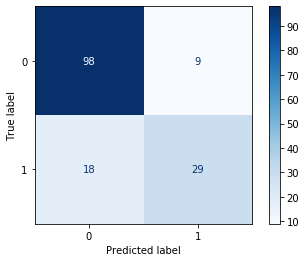

In [41]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(classifier, X_test, y_test, cmap = 'Blues', values_format='.3g')

<h3> Classifier Score for Logistic Regression Model</h3>

In [42]:
print (classifier.score(X_test, y_test))

0.8246753246753247


<h2 style="color:red"> <center> Naive Bayes </h2>

<h3> Fitting Bernoulli Naive Bayes Classifier</h3>

In [45]:
from sklearn.naive_bayes import BernoulliNB
classifier1 = BernoulliNB()
classifier1.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

<h3> Predicted values (w/ Bernoulli Naive Bayes Classifier)</h3>

In [47]:
y_hat1 = classifier1.predict(X_test)
print(y_hat)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0]


<h3> Confusion Matrix for Naive Bayes Model</h3>

In [48]:
from sklearn.metrics import confusion_matrix
conmat = confusion_matrix(y_test, y_hat1)
conmat

array([[90, 17],
       [20, 27]], dtype=int64)

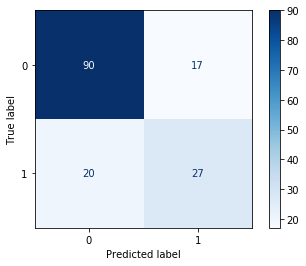

In [49]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(classifier1, X_test, y_test, cmap = 'Blues', values_format='.3g')

<h3> Classifier Score for Naive Bayes Model</h3>

In [50]:
print (classifier1.score(X_test, y_test))

0.7597402597402597


<h3>Checking Significance of model w/ P-Values</h3>

# Feature Extraction

In [52]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train[:, [0,1,2,3,4,5,6,7]])
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.533728
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Diagnosis   No. Observations:                  614
Model:                          Logit   Df Residuals:                      606
Method:                           MLE   Df Model:                            7
Date:                Mon, 04 May 2020   Pseudo R-squ.:                  0.1831
Time:                        16:22:24   Log-Likelihood:                -327.71
converged:                       True   LL-Null:                       -401.18
Covariance Type:            nonrobust   LLR p-value:                 1.787e-28
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2953      0.117      2.518      0.012       0.065       0.525
x2             1.0583      0.

<p>We can see that some of the features like x4, x5 and x8 are not significant to the model so we create another logistic regression with significant regressors only.</p>

<h2 style="color:red"> <center> Logistic Regression w/ significant responses (LRM1)</h2>

In [55]:
X1 = X.iloc[:,[0,1,2,5,6]]
X1.head()

,Pregnancies,Glucose,BloodPressure,BMI,Pedigree
0,6,148,72,33.6,0.627
1,1,85,66,26.6,0.351
2,8,183,64,23.3,0.672
3,1,89,66,28.1,0.167
4,0,137,40,43.1,2.288


<h3> Training and Testing Sets</h3>

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.20, random_state = 0)

<h3> Feature Scaling (Standarizing)</h3>

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<h3> Fitting Logistic Regression</h3>

In [59]:
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression(random_state = 0)
classifier2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<h3>Predicted values</h3>

In [60]:
y_hat2 = classifier2.predict(X_test)
print(y_hat)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0]


<h3>Confusion Matrix</h3>

In [61]:
from sklearn.metrics import confusion_matrix
conmat = confusion_matrix(y_test, y_hat2)
conmat

array([[97, 10],
       [18, 29]], dtype=int64)

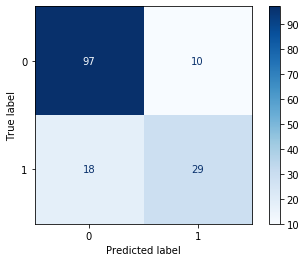

In [62]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(classifier2, X_test, y_test, cmap = 'Blues', values_format='.3g')

<h3>Classifier Score</h3>

In [63]:
print (classifier2.score(X_test, y_test))

0.8181818181818182


# Based on the models created most superior is our LRM2 (83%) with highest accuracy and LRM1 with second accurate model (82%) and Naive Bayed Model with 76% accuracy.